<a href="https://colab.research.google.com/github/cottonbhimireddy1/Chips-category-analysis/blob/main/Quantium_Chips_Category_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load libraries and both data sets

In [ ]:
import pandas as pd
import numpy as np

#load the both data sets
transactions = pd.read_excel("/content/QVI_transaction_data.xlsx")
customers = pd.read_csv("/content/QVI_purchase_behaviour.csv")

#traditional checks
print("Transactions shape:", transactions.shape)
print("Customers shape:", customers.shape)

print("\nTransactions columns:", list(transactions.columns))
print("customers columns:", list(customers.columns))

display(transactions.head(2))
display(customers.head(2))

Transactions shape: (264836, 8)
Customers shape: (72637, 3)

Transactions columns: ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']
customers columns: ['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


In [ ]:
print("------TRANSACTIONS INFO------")
transactions.info()

print("\n------ MISSING VALUES (TRANSACTIONS)")
print(transactions.isna().sum())

------TRANSACTIONS INFO------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB

------ MISSING VALUES (TRANSACTIONS)
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


duplicate and logical validity

In [ ]:
#Check for fully duplicated rows
duplicate_rows = transactions.duplicated().sum()
print("Number of fully duplicated rows:", duplicate_rows)

#Identify numeric columns
numeric_cols = transactions.select_dtypes(include=[np.number]).columns
print("\nNumeric columns:", list(numeric_cols))

#summary statistics for numeric columns
transactions[numeric_cols].describe()

Number of fully duplicated rows: 1

Numeric columns: ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Remove duplicate Transactions row

In [ ]:
#remove duplicate row
transactions_clean = transactions.drop_duplicates()

print ("original rows:", transactions.shape[0])
print("Rows after removing duplicates:", transactions_clean.shape[0])

original rows: 264836
Rows after removing duplicates: 264835


extract pack size from product name

In [ ]:
#cleaned transaction data
transactions_clean = transactions_clean.copy()

#extract pak size from product name(grams)
transactions_clean["PACK_SIZE"] = (
    transactions_clean["PROD_NAME"]
    .str.extract(r"(\d+)\s*[gG]", expand = False)
    .astype(float)

)

#Result
print("columns now:", transactions_clean.shape[1])
display(transactions_clean[["PROD_NAME", "PACK_SIZE"]].head(10))

columns now: 9


,PROD_NAME,PACK_SIZE
0,Natural Chip Compny SeaSalt175g,175.0
1,CCs Nacho Cheese 175g,175.0
2,Smiths Crinkle Cut Chips Chicken 170g,170.0
3,Smiths Chip Thinly S/Cream&Onion 175g,175.0
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150.0
5,Old El Paso Salsa Dip Tomato Mild 300g,300.0
6,Smiths Crinkle Chips Salt & Vinegar 330g,330.0
7,Grain Waves Sweet Chilli 210g,210.0
8,Doritos Corn Chip Mexican Jalapeno 150g,150.0
9,Grain Waves Sour Cream&Chives 210G,210.0


Brand extraction

In [ ]:
#Create BRAND column from product name
transactions_clean["BRAND"]= (
    transactions_clean["PROD_NAME"]
    .str.split()
    .str[0]
    .str.upper()
)

#Check the result
display(transactions_clean[["PROD_NAME", "BRAND", "PACK_SIZE"]].head(10))

print("Top 15 Brands by number of rows:")
print(transactions_clean["BRAND"].value_counts().head(15))



,PROD_NAME,BRAND,PACK_SIZE
0,Natural Chip Compny SeaSalt175g,NATURAL,175.0
1,CCs Nacho Cheese 175g,CCS,175.0
2,Smiths Crinkle Cut Chips Chicken 170g,SMITHS,170.0
3,Smiths Chip Thinly S/Cream&Onion 175g,SMITHS,175.0
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,KETTLE,150.0
5,Old El Paso Salsa Dip Tomato Mild 300g,OLD,300.0
6,Smiths Crinkle Chips Salt & Vinegar 330g,SMITHS,330.0
7,Grain Waves Sweet Chilli 210g,GRAIN,210.0
8,Doritos Corn Chip Mexican Jalapeno 150g,DORITOS,150.0
9,Grain Waves Sour Cream&Chives 210G,GRAIN,210.0


Top 15 Brands by number of rows:
BRAND
KETTLE       41288
SMITHS       28859
PRINGLES     25102
DORITOS      24962
THINS        14075
RRD          11894
INFUZIONS    11057
WW           10320
COBS          9693
TOSTITOS      9471
TWISTIES      9454
OLD           9324
TYRRELLS      6442
GRAIN         6272
NATURAL       6050
Name: count, dtype: int64


Filter only chips category

In [ ]:
#identify non chip products using key words
non_chips_mask = transactions_clean["PROD_NAME"].str.contains(
    "DIP|SALSA|SAUCE", case = False, na = False
)

print("Non-chip rows identified:", non_chips_mask.sum())

#filter to only chips
transactions_chips = transactions_clean[~non_chips_mask].copy()

print("Rows before filtering:", transactions_clean.shape[0])
print("Rows after filtering(chips only):",transactions_chips.shape[0])

Non-chip rows identified: 21035
Rows before filtering: 264835
Rows after filtering(chips only): 243800


Examing the customer data

In [ ]:
#Customer data info
print("\n===CUSTOMER DATA INFO===")
customers.info()

print("\n===MISSING VALUES (CUSTOMERS)===")
print(customers.isna().sum())

print("\n=== SAMPLE CUSTOMER ROWS ===")
display(customers.head(10))


===CUSTOMER DATA INFO===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

===MISSING VALUES (CUSTOMERS)===
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

=== SAMPLE CUSTOMER ROWS ===


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


Merging transactions and Customers data

In [ ]:
#Merge chips transactions with customer data
merged_data = transactions_chips.merge(
    customers,
    how="left",
    on="LYLTY_CARD_NBR"
)

print("Merged dataset shape:", merged_data.shape)

#check merge status
print(
    "Rows with customer info:",
    merged_data["LIFESTAGE"].notna().mean()
)

#preview merged data
display(
    merged_data[

      ["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_NAME", "PACK_SIZE"]
    ].head(10)
)

Merged dataset shape: (243800, 12)
Rows with customer info: 1.0


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g,175.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g,175.0
2,1343,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g,170.0
3,2373,MIDAGE SINGLES/COUPLES,Budget,Smiths Chip Thinly S/Cream&Onion 175g,175.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150.0
5,4149,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Chips Salt & Vinegar 330g,330.0
6,4196,MIDAGE SINGLES/COUPLES,Budget,Grain Waves Sweet Chilli 210g,210.0
7,5026,MIDAGE SINGLES/COUPLES,Budget,Doritos Corn Chip Mexican Jalapeno 150g,150.0
8,7150,MIDAGE SINGLES/COUPLES,Budget,Grain Waves Sour Cream&Chives 210G,210.0
9,7215,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Chips Salt & Vinegar 330g,330.0


dimensions of chips category

In [ ]:
total_sales = merged_data["TOT_SALES"].sum()
total_quantity = merged_data["PROD_QTY"].sum()
unique_customers = merged_data["LYLTY_CARD_NBR"].nunique()
total_transactions = merged_data["TXN_ID"].nunique()

print( "-----CORE CHIPS METRICS------")
print(f"Total sALES: {total_sales:,.2F}")
print(f" Total quantity sold: {total_quantity:,}")
print(f"Unique Customers: {unique_customers:,}")
print(f"Total Transactions: {total_transactions:,}")

#derived metrics
avg_sales_per_transaction = total_sales/total_transactions
avg_units_per_transaction = total_quantity/total_transactions

print("\n=== Derived Metrics===")
print(f"Average sales per Transaction: {avg_sales_per_transaction:,.2f}")
print(f"Average units per transaction: {avg_units_per_transaction:.2f}")



-----CORE CHIPS METRICS------
Total sALES: 1,792,013.10
 Total quantity sold: 465,236
Unique Customers: 71,072
Total Transactions: 242,359

=== Derived Metrics===
Average sales per Transaction: 7.39
Average units per transaction: 1.92


Sales By Customer segment

In [ ]:
#sales per segment

segment_sales = (
    merged_data
    .groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values("TOT_SALES", ascending=False)
)

display(segment_sales.head((10)))


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,155371.35
19,YOUNG SINGLES/COUPLES,Mainstream,146914.00
13,RETIREES,Mainstream,144076.95
15,YOUNG FAMILIES,Budget,128659.75
9,OLDER SINGLES/COUPLES,Budget,126767.60
10,OLDER SINGLES/COUPLES,Mainstream,123538.30
11,OLDER SINGLES/COUPLES,Premium,122595.55
12,RETIREES,Budget,105214.30
7,OLDER FAMILIES,Mainstream,95607.55
14,RETIREES,Premium,90651.85


count and spendinh behaviour

In [ ]:
#CUSTOMER BEHAVIOUR BY SEGMENT

segment_behaviour = (
    merged_data
    .groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg(
        total_sales=("TOT_SALES", "sum"),
        customers=("LYLTY_CARD_NBR", "nunique"),
        transactions=("TXN_ID", "nunique"),
        total_quantity=("PROD_QTY", "sum")
    )
    .reset_index()
)

#derived metrics
segment_behaviour["sales_per_customer"] = (
    segment_behaviour["total_sales"] / segment_behaviour["customers"]
)
segment_behaviour["sales_per_transaction"] = (
    segment_behaviour["total_sales"] / segment_behaviour["transactions"]
)

# Sort by total sales
segment_behaviour = segment_behaviour.sort_values("total_sales", ascending=False)

display(segment_behaviour.head(10))


,LIFESTAGE,PREMIUM_CUSTOMER,total_sales,customers,transactions,total_quantity,sales_per_customer,sales_per_transaction
6,OLDER FAMILIES,Budget,155371.35,4603,21034,41279,33.754367,7.386676
19,YOUNG SINGLES/COUPLES,Mainstream,146914.00,7904,19340,35968,18.587298,7.596381
13,RETIREES,Mainstream,144076.95,6332,19657,37257,22.753782,7.329549
15,YOUNG FAMILIES,Budget,128659.75,3944,17420,34075,32.621640,7.385749
9,OLDER SINGLES/COUPLES,Budget,126767.60,4833,16875,32473,26.229588,7.512154
10,OLDER SINGLES/COUPLES,Mainstream,123538.30,4846,16735,32180,25.492839,7.382032
11,OLDER SINGLES/COUPLES,Premium,122595.55,4672,16285,31333,26.240486,7.528127
12,RETIREES,Budget,105214.30,4368,14003,26662,24.087523,7.513697
7,OLDER FAMILIES,Mainstream,95607.55,2779,12970,25494,34.403580,7.371438
14,RETIREES,Premium,90651.85,3801,12051,23018,23.849474,7.522351


Pack size and brand insights

In [ ]:
#PACK SIZE ANALYSIS

pack_size_sales = (
    merged_data
    .groupby("PACK_SIZE")["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values("TOT_SALES", ascending=False)
)

display(pack_size_sales.head(10))


#BRAND ANALYSIS

brand_sales = (
    merged_data
    .groupby("BRAND")["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values("TOT_SALES", ascending=False)
)

display(brand_sales.head(10))


,PACK_SIZE,TOT_SALES
10,175.0,485431.4
6,150.0,275223.2
4,134.0,177655.5
2,110.0,162765.4
9,170.0,146673.0
18,330.0,136794.3
8,165.0,101360.6
19,380.0,76719.6
17,270.0,55425.4
14,210.0,43048.8


,BRAND,TOT_SALES
12,KETTLE,390239.8
19,SMITHS,188444.0
6,DORITOS,187277.9
15,PRINGLES,177655.5
22,THINS,88852.5
24,TWISTIES,81522.1
23,TOSTITOS,79789.6
10,INFUZIONS,76247.6
4,COBS,70569.8
17,RRD,64954.5


Deep dive and targeting

In [ ]:
#DRIVER ANALYSIS: WHO TO TARGET

target_analysis = (
    merged_data
    .groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg(
        total_sales=("TOT_SALES", "sum"),
        customers=("LYLTY_CARD_NBR", "nunique"),
        transactions=("TXN_ID", "nunique"),
        avg_pack_size=("PACK_SIZE", "mean")
    )
    .reset_index()
    .sort_values("total_sales", ascending=False)
)

display(target_analysis.head(10))


,LIFESTAGE,PREMIUM_CUSTOMER,total_sales,customers,transactions,avg_pack_size
6,OLDER FAMILIES,Budget,155371.35,4603,21034,175.901503
19,YOUNG SINGLES/COUPLES,Mainstream,146914.00,7904,19340,178.553167
13,RETIREES,Mainstream,144076.95,6332,19657,175.499696
15,YOUNG FAMILIES,Budget,128659.75,3944,17420,175.767250
9,OLDER SINGLES/COUPLES,Budget,126767.60,4833,16875,175.652869
10,OLDER SINGLES/COUPLES,Mainstream,123538.30,4846,16735,175.142246
11,OLDER SINGLES/COUPLES,Premium,122595.55,4672,16285,176.793084
12,RETIREES,Budget,105214.30,4368,14003,176.667472
7,OLDER FAMILIES,Mainstream,95607.55,2779,12970,175.485550
14,RETIREES,Premium,90651.85,3801,12051,176.649376


conclusion

In [ ]:
# FINAL RECOMMENDATIONS SUMMARY

recommendations = {
    "Target Segment": "Older Families",
    "Key Insight": "This segment shows higher value per customer and preference for larger pack sizes.",
    "Pack Strategy": "Prioritise popular pack sizes such as 175g and larger family packs.",
    "Brand Focus": "Maintain strong presence of leading brands like Smiths and Kettle.",
    "Promotion Strategy": "Use value-based and multi-buy promotions to encourage repeat purchases."
}

for k, v in recommendations.items():
    print(f"{k}: {v}")


Target Segment: Older Families
Key Insight: This segment shows higher value per customer and preference for larger pack sizes.
Pack Strategy: Prioritise popular pack sizes such as 175g and larger family packs.
Brand Focus: Maintain strong presence of leading brands like Smiths and Kettle.
Promotion Strategy: Use value-based and multi-buy promotions to encourage repeat purchases.


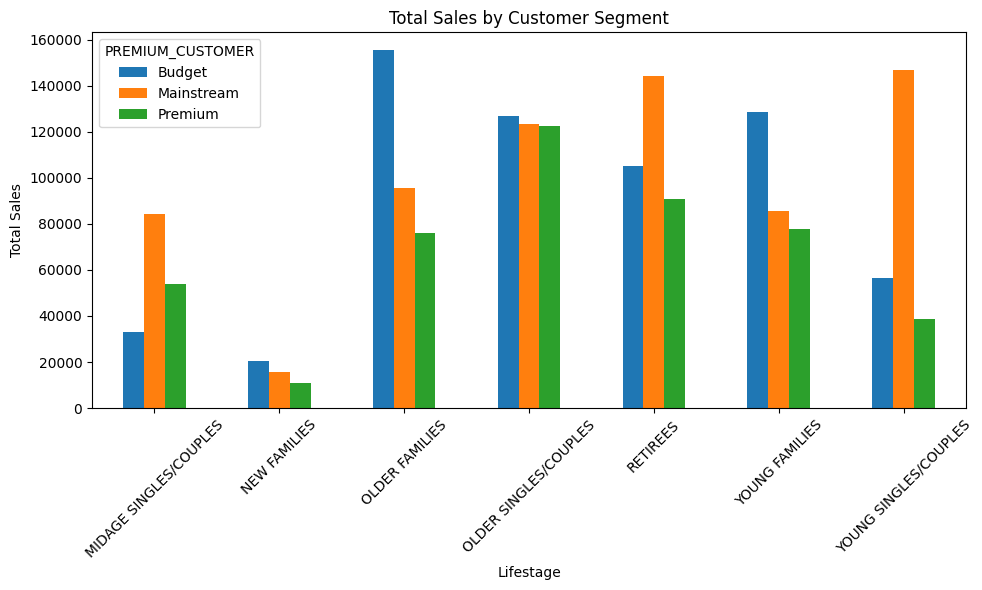

In [ ]:
import matplotlib.pyplot as plt

# Aggregate sales by segment
segment_sales = (
    merged_data
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
    .sum()
    .unstack()
)

# Plot
segment_sales.plot(kind='bar', figsize=(10,6))
plt.title('Total Sales by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
